# Exploracion de los datos del dataset iris

In [1]:
%pip install seaborn
%pip install pandas
%pip install plotly --upgrade 
%pip install prettytable
%pip install nbformat --upgrade 

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

import prettytable

prettytable.DEFAULT = 'DEFAULT'

# Cargar el dataset
df = pd.read_csv("iris.csv")

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Ver las primeras filas
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
from plotly.subplots import make_subplots

# Crear subplots con formato 2x2
fig = make_subplots(rows=2, 
                    cols=2,
                    subplot_titles=('Longitud Sépalo', 'Ancho Sépalo', 
                                    'Longitud Pétalo', 'Ancho Pétalo'),
                    horizontal_spacing=0.15,
                    vertical_spacing=0.15)

# Características y posiciones en la cuadrícula
caracteristicas = [
    ('sepal_length', 1, 1),
    ('sepal_width', 1, 2),
    ('petal_length', 2, 1),
    ('petal_width', 2, 2)
]

# Generar cada gráfico y añadirlo a la posición correspondiente
for columna, row, col in caracteristicas:
    # Crear box plot individual
    box_fig = px.box(df, 
                     x="species", 
                     y=columna,
                     color="species",
                     width=400,
                     height=300)
    
    # Añadir cada traza al subplot correspondiente
    for trace in box_fig['data']:
        fig.add_trace(trace, row=row, col=col)
    
    # Configurar ejes y título
    nombre = columna.replace("_", " ").title()
    fig.update_yaxes(title_text=nombre, row=row, col=col)
    fig.update_xaxes(title_text='Especie', row=row, col=col)

# Configurar layout general
fig.update_layout(
    title_text='Distribuciones del Dataset Iris por Especie',
    showlegend=False,
    height=800,
    width=1000,
    margin=dict(t=100)
)

fig.show()

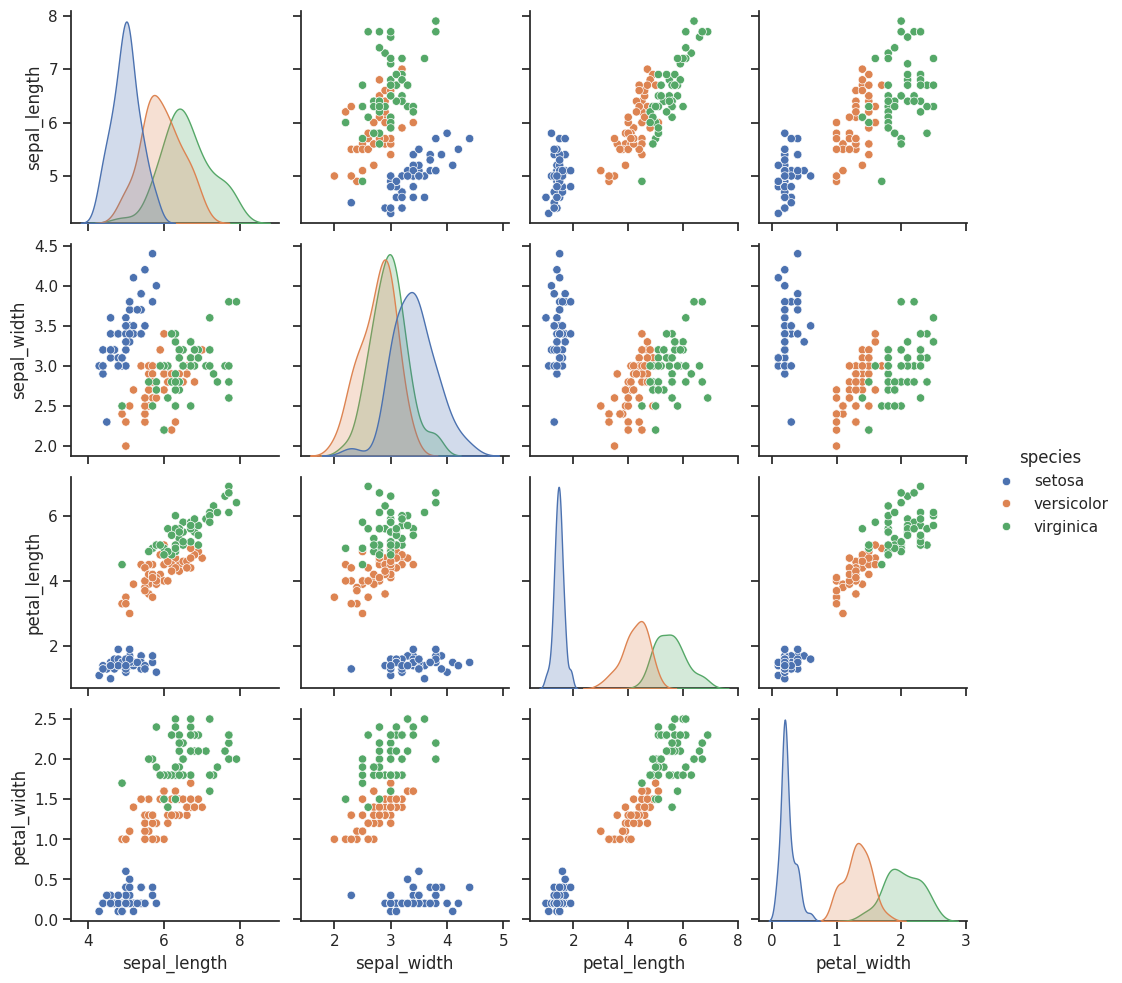

In [6]:
sns.set_theme(style="ticks")

sns.pairplot(df, hue="species")

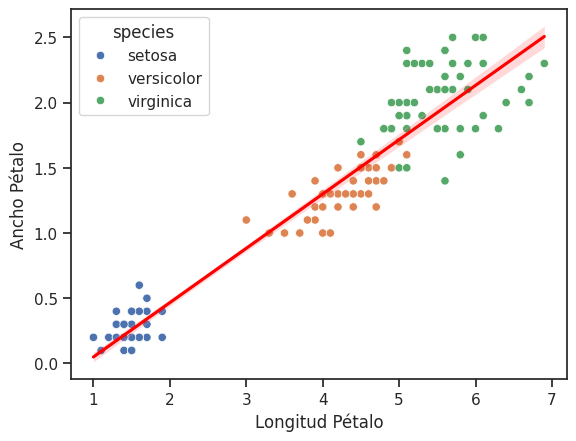

In [7]:
# Crear el scatterplot con colores por especie
sns.scatterplot(
    data=df,
    x="petal_length", y="petal_width", hue="species"
)

# Agregar la línea de regresión para todas las especies
sns.regplot(
    data=df,
    x="petal_length", y="petal_width",
    scatter=False, color="red"
)

# Personalizar etiquetas de los ejes
plt.xlabel('Longitud Pétalo')
plt.ylabel('Ancho Pétalo')

plt.show()


In [8]:
# Normalizar las columnas numéricas para mejor visualización
df.iloc[:, :-1] = (df.iloc[:, :-1] - df.iloc[:, :-1].min()) / (df.iloc[:, :-1].max() - df.iloc[:, :-1].min())

# Graficar coordenadas paralelas
fig = px.parallel_coordinates(df, dimensions=df.columns[:-1], color=df['species'].astype('category').cat.codes)
fig.show()